<a href="https://colab.research.google.com/github/SXV357/Inspirit-AI-ML-Basics-Notebooks/blob/main/NeuralNetworksExtension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, InputLayer
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.utils.np_utils import to_categorical 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def categorical_to_numpy(labels_in):
  labels = []
  for label in labels_in:
    if label == 'dog':
      labels.append(np.array([1, 0]))
    else:
      labels.append(np.array([0, 1]))
  return np.array(labels)


def load_data():
  # Run this cell to download our data into a file called 'cifar_data'
  import gdown
  # gdown.download('https://drive.google.com/uc?id=1-BjeqccJdLiBA6PnNinmXSQ6w5BluLem','cifar_data','True'); # dogs v road;
  !wget -O cifar_data https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads

  # now load the data from our cloud computer
  import pickle
  data_dict = pickle.load(open( "cifar_data", "rb" ));
  
  data   = data_dict['data']
  labels = data_dict['labels']
  
  return data, labels

def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  plt.imshow(my_img)
  plt.show()
  
def CNNClassifier(num_epochs=2, layers=1, dropout=0.15):
  def create_model():
    model = Sequential()
    model.add(Reshape((32, 32, 3)))
    
    for i in range(layers):
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 7)    
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    
    plt.show()
    
def model_to_string(model):
    import re
    stringlist = []
    model.summary(print_fn=lambda x: stringlist.append(x))
    sms = "\n".join(stringlist)
    sms = re.sub('_\d\d\d','', sms)
    sms = re.sub('_\d\d','', sms)
    sms = re.sub('_\d','', sms)  
    return sms

In [12]:
# for utilizing the GPU
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: ignored

In [7]:
data_raw, labels_raw = load_data()
data = data_raw.astype(float)
labels = categorical_to_numpy(labels_raw)
inputs_train, inputs_test, labels_train, labels_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=1)

data.shape

--2022-06-18 03:23:39--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3689015 (3.5M) [application/octet-stream]
Saving to: ‘cifar_data’

cifar_data          100%[===================>]   3.52M  --.-KB/s    in 0.06s   

2022-06-18 03:23:39 (59.8 MB/s) - ‘cifar_data’ saved [3689015/3689015]



(1200, 3072)

label: road


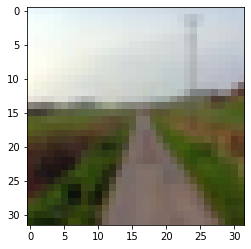

In [8]:
plot_one_image(data_raw, labels_raw, 1199)

In [13]:
# loading up a simple CNN and calculating accuracy

cnn = CNNClassifier(50, 2, 0.5)
cnn.fit(inputs_train, labels_train)
preds = cnn.predict(inputs_test)
print (f'{cnn.score(inputs_test, labels_test) * 100} %')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/50
96/96 - 20s - loss: 6.4840 - accuracy: 0.6146 - 20s/epoch - 205ms/step
Epoch 2/50
96/96 - 8s - loss: 1.3299 - accuracy: 0.7427 - 8s/epoch - 86ms/step
Epoch 3/50
96/96 - 6s - loss: 0.5890 - accuracy: 0.8375 - 6s/epoch - 66ms/step
Epoch 4/50
96/96 - 6s - loss: 0.4079 - accuracy: 0.8531 - 6s/epoch - 66ms/step
Epoch 5/50
96/96 - 6s - loss: 0.2991 - accuracy: 0.8927 - 6s/epoch - 66ms/step
Epoch 6/50
96/96 - 6s - loss: 0.3030 - accuracy: 0.8813 - 6s/epoch - 66ms/step
Epoch 7/50
96/96 - 6s - loss: 0.2423 - accuracy: 0.9167 - 6s/epoch - 66ms/step
Epoch 8/50
96/96 - 6s - loss: 0.2292 - accuracy: 0.9177 - 6s/epoch - 66ms/step
Epoch 9/50
96/96 - 6s - loss: 0.2141 - accuracy: 0.9292 - 6s/epoch - 66ms/step
Epoch 10/50
96/96 - 6s - loss: 0.2008 - accuracy: 0.9323 - 6s/epoch - 66ms/step
Epoch 11/50
96/96 - 6s - loss: 0.2099 - accuracy: 0.9302 - 6s/epoch - 66ms/step
Epoch 12/50
96/96 - 6s - loss: 0.2143 - accuracy: 0.9250 - 6s/epoch - 66ms/step
Epoch 13/50
96/96 - 6s - loss: 0.1898 - accura

Epoch 1/20
96/96 - 14s - loss: 5.8319 - accuracy: 0.6135 - val_loss: 0.3455 - val_accuracy: 0.8708 - 14s/epoch - 148ms/step
Epoch 2/20
96/96 - 12s - loss: 1.1133 - accuracy: 0.7656 - val_loss: 0.2286 - val_accuracy: 0.9042 - 12s/epoch - 123ms/step
Epoch 3/20
96/96 - 13s - loss: 0.6593 - accuracy: 0.8427 - val_loss: 0.1454 - val_accuracy: 0.9458 - 13s/epoch - 133ms/step
Epoch 4/20
96/96 - 8s - loss: 0.4531 - accuracy: 0.8583 - val_loss: 0.1417 - val_accuracy: 0.9583 - 8s/epoch - 78ms/step
Epoch 5/20
96/96 - 7s - loss: 0.3240 - accuracy: 0.8833 - val_loss: 0.1482 - val_accuracy: 0.9500 - 7s/epoch - 71ms/step
Epoch 6/20
96/96 - 7s - loss: 0.3108 - accuracy: 0.9000 - val_loss: 0.1376 - val_accuracy: 0.9500 - 7s/epoch - 71ms/step
Epoch 7/20
96/96 - 7s - loss: 0.2576 - accuracy: 0.9146 - val_loss: 0.1518 - val_accuracy: 0.9375 - 7s/epoch - 71ms/step
Epoch 8/20
96/96 - 7s - loss: 0.2255 - accuracy: 0.9281 - val_loss: 0.1264 - val_accuracy: 0.9625 - 7s/epoch - 71ms/step
Epoch 9/20
96/96 - 7s -

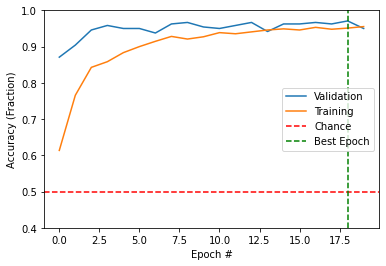

In [16]:
# plotting training vs validation curve
history = cnn.fit(inputs_train, labels_train, validation_data = (inputs_test, labels_test), epochs = 20)
plot_acc(history)

In [21]:
# building a NN from scratch
 # classifies image as cat or dog based on height, weight and age
 
model_1 = Sequential()
model_1.add(InputLayer(input_shape=(3,))) # input layer
model_1.add(Dense(4, activation = 'relu')) # hidden layer(nonlinear activation function --> max(0, weighted sum of inputs and weights))
model_1.add(Dense(2, activation = 'softmax')) # output layer(returns a probability between 0 and 1)
model_1.compile(loss='categorical_crossentropy',
                optimizer = 'adam', 
                metrics = ['accuracy'])
model_1.predict([[14,18,5]]) #Try any input! This represents an animal of height 14, weight 18, and age 5.

array([[0.99820006, 0.00179988]], dtype=float32)

In [22]:
# building multi-layer NN

new_model = Sequential()
new_model.add(InputLayer(input_shape=(3,)))
new_model.add(Dense(4, activation = 'relu'))
new_model.add(Dense(4, activation = 'relu'))
new_model.add(Dense(1, activation = 'sigmoid'))
new_model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mean_squared_error'])
new_model.predict([[17, 20, 6]])

array([[0.9999807]], dtype=float32)

In [23]:
# distinguishing between images of dogs and roads again
m = Sequential()
m.add(InputLayer(input_shape = (3072,)))
m.add(Dense(32, activation = 'relu'))
m.add(Dense(16, activation = 'relu'))
m.add(Dense(2, activation = 'sigmoid'))
m.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['mean_squared_error'])
m.predict(inputs_train)

array([[1.0000000e+00, 1.6999986e-24],
       [1.0000000e+00, 1.4234413e-29],
       [1.0000000e+00, 8.1237781e-01],
       ...,
       [1.0000000e+00, 3.1888392e-14],
       [1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00]], dtype=float32)

Epoch 1/40
30/30 [==============================] - 7s 200ms/step - loss: 2.0812 - accuracy: 0.5396 - val_loss: 1.3093 - val_accuracy: 0.4708
Epoch 2/40
30/30 [==============================] - 7s 222ms/step - loss: 0.7162 - accuracy: 0.6375 - val_loss: 0.4053 - val_accuracy: 0.7958
Epoch 3/40
30/30 [==============================] - 6s 190ms/step - loss: 0.3669 - accuracy: 0.8323 - val_loss: 0.2616 - val_accuracy: 0.9000
Epoch 4/40
30/30 [==============================] - 6s 190ms/step - loss: 0.2918 - accuracy: 0.8740 - val_loss: 0.2391 - val_accuracy: 0.9125
Epoch 5/40
30/30 [==============================] - 6s 190ms/step - loss: 0.1762 - accuracy: 0.9260 - val_loss: 0.1702 - val_accuracy: 0.9417
Epoch 6/40
30/30 [==============================] - 6s 190ms/step - loss: 0.1398 - accuracy: 0.9510 - val_loss: 0.1770 - val_accuracy: 0.9167
Epoch 7/40
30/30 [==============================] - 6s 190ms/step - loss: 0.1050 - accuracy: 0.9667 - val_loss: 0.2590 - val_accuracy: 0.8875
Epoch 

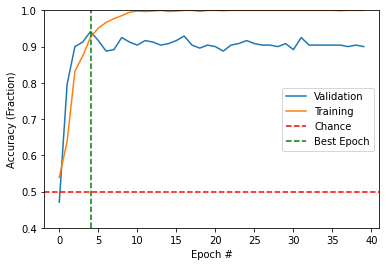

In [25]:
# building CNN from scratch

model = Sequential()
model.add(Reshape((32, 32, 3)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Dense(100))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the CNN and plot accuracy.
history = model.fit(inputs_train, labels_train, \
                    validation_data=(inputs_test, labels_test), \
                    epochs=40)
plot_acc(history)

In [26]:
# printing out structure of model
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 32, 32, 3)         0         
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_39 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 activation_40 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 dense_30 (Dense)            (None, 16, 16, 256)       8448      
                                                     

In [27]:
# adapting previous model to classify large images of cats and dogs

import tensorflow as tf
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

try:
  road_model = model
  road_saved = True
except NameError:
  road_saved = False

IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
train_image_generator      = ImageDataGenerator()  # Generator for our training data
validation_image_generator = ImageDataGenerator()  # Generator for our validation data
train_data = train_image_generator.flow_from_directory(batch_size=2000,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary').next()
test_data = validation_image_generator.flow_from_directory(batch_size=1000,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)

                                                              class_mode='binary').next()
cd_train_inputs, cd_train_labels = train_data
cd_test_inputs, cd_test_labels = test_data

68616192/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
# checking dimensions of training and validation data

print (cd_train_inputs.shape) 
print (cd_train_labels.shape) 
print (cd_test_inputs.shape) 
print (cd_test_labels.shape) 

(2000, 150, 150, 3)
(2000,)
(1000, 150, 150, 3)
(1000,)


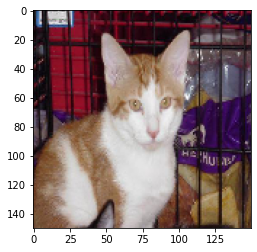

Label: 0.0


In [29]:
# generate random img from training data
index = np.random.randint(len(cd_train_inputs))
plt.imshow(cd_train_inputs[index]/255)
plt.show()
print("Label:",cd_train_labels[index])

In [59]:
model = Sequential()
#TODO: Your code here to build, train, and test a cats vs. dogs CNN!
#If you run into errors, see the hints above for help debugging! 
model.add(Conv2D(150, (3,3), padding = 'same'))
model.add(Dropout(0.3))
model.add(Activation('relu'))

model.add(Dense(125, activation = 'relu'))
model.add(Dense(125, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

optimizer = keras.optimizers.RMSprop(learning_rate = 0.0001, decay = 1e-6)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


# new_hist = model.fit(cd_train_inputs, cd_train_labels, validation_data = (cd_test_inputs, cd_test_labels), epochs = 50)
# plot_acc(new_hist)

print(cd_test_inputs.shape)
print(cd_test_labels.shape)


(1000, 150, 150, 3)
(1000,)
